In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#Read the dataset from CSV File
data = pd.read_csv("data.csv" , index_col= 0)
data.head(100)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,99,8,0,9.0,0,1,14,31,19,12,3,1,0,0
96,99,8,1,40.0,1,0,14,31,19,12,3,1,0,0
97,99,8,1,28.0,1,0,14,31,19,12,3,1,3,0
98,99,8,1,27.0,1,0,14,31,19,12,3,1,0,0


In [ ]:
#Dividing dataset into features and result
#Put Features into X
X = data[['location' , 'country' , 'gender' , 'age' , 'vis_wuhan' , 'from_wuhan' , 'symptom1' , 'symptom2' , 'symptom3', 'symptom4' , 'symptom5' , 'symptom6' , 'diff_sym_hos']]
#Labeled Data
Y = data.result
print(X.shape)
print(Y.shape)

(863, 13)
(863,)


In [ ]:
#splite the data into Train and Test by 90% for training to 10% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .1, random_state = 3)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(776, 13)
(87, 13)
(776,)
(87,)


In [ ]:
#normalize the data values
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

In [ ]:
#GrideSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
# get_grid_para = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf'], 'probability':[True,False]}
# grid_result = GridSearchCV(SVC(), get_grid_para, refit = True, verbose = 3) 
# grid_result.fit(xTrain, yTrain)

In [ ]:
# print(grid_result.best_params_, '  ' , grid_result.best_estimator_ , ' The Best Score : ' , grid_result.best_score_)

In [ ]:
#train the model with optimal hyperparameters
SVM_model = SVC( kernel = 'rbf', C=100 , gamma=0.01 , random_state = 0 , probability=True)
SVM_model.fit(xTrain, yTrain)

SVC(C=100, gamma=0.01, probability=True, random_state=0)

In [ ]:
#test the accuracy of model on training set
print('SVM_model Train Score is : ' , SVM_model.score(xTrain, yTrain))


SVM_model Train Score is :  0.9832474226804123


In [ ]:
yPred = SVM_model.predict(xTest)
yPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

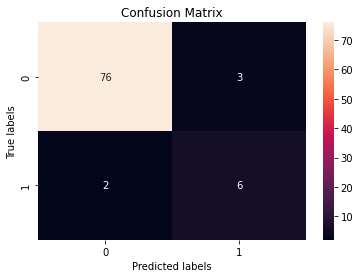

In [ ]:
#Calculating Prediction
yPred = SVM_model.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        79
           1       0.67      0.75      0.71         8

    accuracy                           0.94        87
   macro avg       0.82      0.86      0.84        87
weighted avg       0.95      0.94      0.94        87



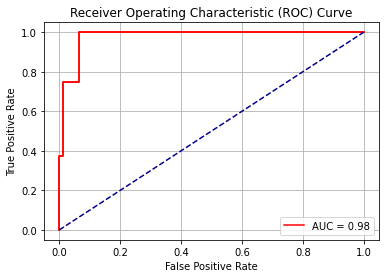

In [ ]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, SVM_model.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, SVM_model.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()